<a href="https://colab.research.google.com/github/leokan92/class/blob/main/Aula_3_Redes_neurais_recorrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 - Redes neurais recorrentes

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

##Visualização da atualização dos gradientes

Período 1: Ajustes de Wxh: 0.010448, Whh: 0.023140, Why: 0.324503
Período 2: Ajustes de Wxh: 0.006796, Whh: 0.047295, Why: 0.666517
Período 3: Ajustes de Wxh: 0.038489, Whh: 0.086030, Why: 1.213976
Período 4: Ajustes de Wxh: 0.089270, Whh: 0.071055, Why: 1.002860
Período 5: Ajustes de Wxh: 0.003320, Whh: 0.013023, Why: 0.182679
Período 6: Ajustes de Wxh: 0.023573, Whh: 0.065207, Why: 0.912829
Período 7: Ajustes de Wxh: 0.023329, Whh: 0.124385, Why: 1.744131
Período 8: Ajustes de Wxh: 0.017690, Whh: 0.137018, Why: 1.927368
Período 9: Ajustes de Wxh: 0.032085, Whh: 0.097800, Why: 1.380067
Período 10: Ajustes de Wxh: 0.029033, Whh: 0.025598, Why: 0.363877


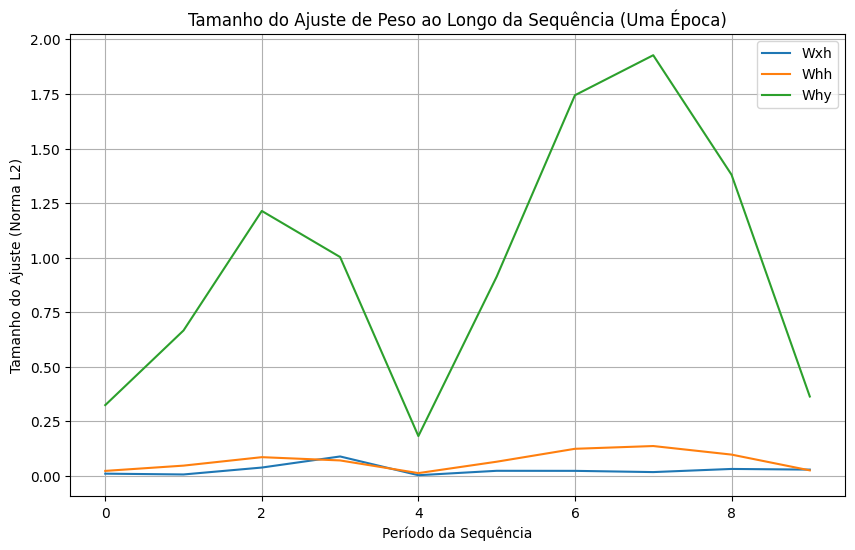

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada da função sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Definição de uma RNN simples
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicializando pesos aleatórios
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.1  # Pesos input -> hidden
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.1  # Pesos hidden -> hidden
        self.Why = np.random.randn(output_size, hidden_size) * 0.1  # Pesos hidden -> output

        # Inicializando os estados ocultos como zero
        self.h_prev = np.zeros((hidden_size, 1))

    def forward(self, x):
        # Calcula a propagação para frente
        self.h = sigmoid(np.dot(self.Wxh, x) + np.dot(self.Whh, self.h_prev))  # Novo estado oculto
        self.y = np.dot(self.Why, self.h)  # Saída final
        self.h_prev = self.h  # Atualiza o estado oculto anterior
        return self.y, self.h

    def backward(self, x, dy, lr=0.001):
        # Propagação do erro e ajuste de pesos (backpropagation through time)
        dh = np.dot(self.Why.T, dy) * sigmoid_derivative(self.h)  # Derivada do erro em relação ao estado oculto
        dWhy = np.dot(dy, self.h.T)  # Gradiente do peso Why
        dWxh = np.dot(dh, x.T)  # Gradiente do peso Wxh
        dWhh = np.dot(dh, self.h_prev.T)  # Gradiente do peso Whh

        # Atualizando os pesos
        self.Why -= lr * dWhy
        self.Wxh -= lr * dWxh
        self.Whh -= lr * dWhh

        return np.linalg.norm(dWxh), np.linalg.norm(dWhh), np.linalg.norm(dWhy)  # Retorna o tamanho dos ajustes

# Função para treinar a RNN e visualizar a propagação do erro
def train_rnn():
    input_size = 1  # Tamanho da entrada (1D)
    hidden_size = 10  # Tamanho da camada oculta
    output_size = 1  # Tamanho da saída (1D)

    # Criando uma RNN simples
    rnn = SimpleRNN(input_size, hidden_size, output_size)

    # Exemplo de sequência de entrada
    seq_length = 10
    inputs = np.random.randn(input_size, seq_length)
    targets = np.sin(np.linspace(0, 2 * np.pi, seq_length))  # Usando uma senoide como alvo

    # Armazenando os ajustes de peso para cada período da sequência
    weight_updates = []

    # Executa apenas uma época
    for t in range(seq_length):
        x = inputs[:, t].reshape(-1, 1)  # Pegando uma amostra da sequência
        target = targets[t]

        # Forward pass
        y_pred, _ = rnn.forward(x)

        # Erro
        loss = y_pred - target

        # Backpropagation
        dWxh_norm, dWhh_norm, dWhy_norm = rnn.backward(x, loss)

        # Armazenando os ajustes de peso
        weight_updates.append((dWxh_norm, dWhh_norm, dWhy_norm))
        print(f"Período {t + 1}: Ajustes de Wxh: {dWxh_norm:.6f}, Whh: {dWhh_norm:.6f}, Why: {dWhy_norm:.6f}")

    # Plotando o tamanho dos ajustes de peso ao longo da sequência
    weight_updates = np.array(weight_updates)
    plt.figure(figsize=(10, 6))
    plt.plot(weight_updates[:, 0], label='Wxh')
    plt.plot(weight_updates[:, 1], label='Whh')
    plt.plot(weight_updates[:, 2], label='Why')
    plt.title('Tamanho do Ajuste de Peso ao Longo da Sequência (Uma Época)')
    plt.xlabel('Período da Sequência')
    plt.ylabel('Tamanho do Ajuste (Norma L2)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Treinar a RNN e visualizar a propagação do erro
train_rnn()


## Dataset com dados sintéticos



In [ ]:
# Gerar dados mais complexos
def generate_complex_data(sequence_length, num_samples, noise=0.1):
    x_values = np.linspace(0, 8 * np.pi, sequence_length)  # Aumentando o período
    data = np.array([np.sin(x_values) + 0.5 * np.sin(2 * x_values + np.pi / 4) for _ in range(num_samples)])
    data = data + noise * np.random.randn(num_samples, sequence_length)
    data = data.reshape((num_samples, sequence_length, 1))
    return torch.tensor(data, dtype=torch.float32)


In [ ]:
# Gerar dados com dependências de longo alcance
def generate_complex_data_with_noise(sequence_length, num_samples, noise=0.1):
    intervals = np.linspace(0, 50 * np.pi, sequence_length)
    data = np.sin(intervals) * np.sin(0.1 * intervals)
    data = np.array([data for _ in range(num_samples)])
    data = data + noise * np.random.randn(num_samples, sequence_length)
    return torch.tensor(data, dtype=torch.float32).view(num_samples, sequence_length, -1)


In [ ]:
# Parâmetros
sequence_length = 400  # Aumentando o tamanho da sequência
num_train_samples = 1000
num_test_samples = 200

train_data = generate_complex_data_with_noise(sequence_length, num_train_samples)
test_data = generate_complex_data_with_noise(sequence_length, num_test_samples)

## Definimos os modelos

In [ ]:
# Definir modelos
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.rnn(x)
        output = self.linear(output)
        return output

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.linear(output)
        return output

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        output, _ = self.gru(x)
        output = self.linear(output)
        return output

## Definimos os otimizadores, etc.

In [ ]:
# Parâmetros
input_dim = 1
hidden_dim = 32
learning_rate = 0.01
num_epochs = 100

# Instanciar modelos e otimizadores
rnn_model = RNNModel(input_dim, hidden_dim)
lstm_model = LSTMModel(input_dim, hidden_dim)
gru_model = GRUModel(input_dim, hidden_dim)

optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=learning_rate)
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=learning_rate)
optimizer_gru = optim.Adam(gru_model.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

## Treino

In [ ]:
import time

# Treinamento
def train_model(model, optimizer):
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(train_data)
        loss = criterion(output[:, :-1, :], train_data[:, 1:, :])
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
    return loss_history

# Função para treinar e cronometrar o modelo
def train_and_time_model(model, optimizer):
    start_time = time.time()
    loss_curve = train_model(model, optimizer)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return loss_curve, elapsed_time

## Teste e comparação

RNN Test Loss: 0.04998217150568962, Time: 39.76 seconds
LSTM Test Loss: 0.04977691173553467, Time: 139.75 seconds
GRU Test Loss: 0.04849305748939514, Time: 113.86 seconds


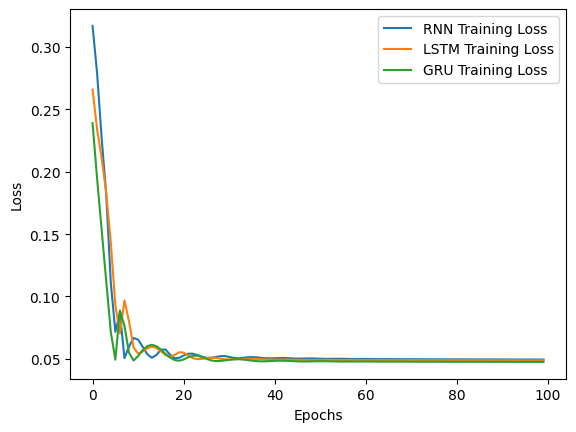

In [ ]:
# Avaliar modelos em conjunto de testes
def evaluate_model(model, test_data):
    model.eval()
    with torch.no_grad():
        output = model(test_data)
        loss = criterion(output[:, :-1, :], test_data[:, 1:, :])
    return loss.item()

# Treinamento e cronometragem
rnn_loss, rnn_time = train_and_time_model(rnn_model, optimizer_rnn)
lstm_loss, lstm_time = train_and_time_model(lstm_model, optimizer_lstm)
gru_loss, gru_time = train_and_time_model(gru_model, optimizer_gru)


# Avaliação
rnn_test_loss = evaluate_model(rnn_model, test_data)
lstm_test_loss = evaluate_model(lstm_model, test_data)
gru_test_loss = evaluate_model(gru_model, test_data)

print(f'RNN Test Loss: {rnn_test_loss}, Time: {rnn_time:.2f} seconds')
print(f'LSTM Test Loss: {lstm_test_loss}, Time: {lstm_time:.2f} seconds')
print(f'GRU Test Loss: {gru_test_loss}, Time: {gru_time:.2f} seconds')

# Plotar as curvas de perda de treinamento
plt.figure()
plt.plot(rnn_loss, label='RNN Training Loss')
plt.plot(lstm_loss, label='LSTM Training Loss')
plt.plot(gru_loss, label='GRU Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Problema de processamento de texto

## Preparação do dataset

In [ ]:
# Importing required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from nltk.corpus import gutenberg
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the Gutenberg dataset from NLTK
nltk.download('gutenberg')
nltk.download('punkt')

# 1. Preprocess the data
# Using "Hamlet" by Shakespeare from the Gutenberg corpus as a small, public domain text
text = gutenberg.raw('shakespeare-hamlet.txt').lower()[:]  # Using a subset for demonstration

# Tokenize words and create vocabulary
words = word_tokenize(text)
vocab = set(words)
word_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_word = {i: word for i, word in enumerate(vocab)}

# Encode text as sequences of word indices
encoded_text = [word_to_idx[word] for word in words]

# Create input-output pairs for training
sequence_length = 4
sequences = []
targets = []
for i in range(len(encoded_text) - sequence_length):
    sequences.append(encoded_text[i:i + sequence_length])
    targets.append(encoded_text[i + sequence_length])

sequences = torch.tensor(sequences)
targets = torch.tensor(targets)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
len(gutenberg.raw('shakespeare-hamlet.txt').lower())

162881

## Classe da rede neural recorrente

In [ ]:
class WordPredictorRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(WordPredictorRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # Predict using the last time step
        return out, hidden


## Treinamento da rede recorrente

In [ ]:
vocab_size = len(vocab)
embedding_dim = 50
hidden_dim = 50

model = WordPredictorRNN(vocab_size, embedding_dim, hidden_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# 3. Train the model
num_epochs = 200
for epoch in range(num_epochs):
    hidden = None  # Hidden state reset for each epoch
    optimizer.zero_grad()
    output, hidden = model(sequences, hidden)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/200], Loss: 6.1700
Epoch [20/200], Loss: 5.7176
Epoch [30/200], Loss: 5.2879
Epoch [40/200], Loss: 4.8975
Epoch [50/200], Loss: 4.5530
Epoch [60/200], Loss: 4.2567
Epoch [70/200], Loss: 4.0015
Epoch [80/200], Loss: 3.7779
Epoch [90/200], Loss: 3.5768
Epoch [100/200], Loss: 3.3906
Epoch [110/200], Loss: 3.2147
Epoch [120/200], Loss: 3.0455
Epoch [130/200], Loss: 2.8836
Epoch [140/200], Loss: 2.7306
Epoch [150/200], Loss: 2.5887
Epoch [160/200], Loss: 2.4561
Epoch [170/200], Loss: 2.3341
Epoch [180/200], Loss: 2.2243
Epoch [190/200], Loss: 2.1225
Epoch [200/200], Loss: 2.0322


#Inferência

In [ ]:
# 4. Inference with activation visualization
def predict_next_words(input_words, model, hidden=None):
    model.eval()  # Set model to evaluation mode
    input_idx = [word_to_idx[word] for word in input_words]
    input_tensor = torch.tensor(input_idx).unsqueeze(0)

    with torch.no_grad():
        activations = []
        for i in range(input_tensor.size(1)):
            out, hidden = model(input_tensor[:, :i+1], hidden)
            activations.append(hidden.squeeze().numpy())  # Store hidden states
        predicted_idx = torch.argmax(out, dim=1).item()
        predicted_word = idx_to_word[predicted_idx]

    return predicted_word, activations

# Demonstrate prediction with activations
input_words = words[1:sequence_length+1]  # Example input of 4 words
predicted_word, activations = predict_next_words(input_words, model)

print("Input words:", input_words)
print("Predicted next word:", predicted_word)
print("RNN activations for each word in the sequence:")
for i, activation in enumerate(activations):
    print(f"Word {i+1} '{input_words[i]}': Activation -", activation)

Input words: ['the', 'tragedie', 'of', 'hamlet']
Predicted next word: ,
RNN activations for each word in the sequence:
Word 1 'the': Activation - [ 0.03978153  0.9999994   0.39908192 -0.2756597  -0.99998635 -0.9999997
 -0.5351892  -0.9996694   0.9147393  -0.9999999   0.68243146 -0.9618968
 -0.3897405   0.9999995   0.9995688  -1.         -0.9999999  -0.9913404
  1.          0.99990696 -0.997341    0.9999966   0.3634146   0.9999991
  1.         -0.02664138 -0.5997328   0.99999887  0.8619756  -0.7858214
 -0.65037185  0.99481624 -0.9997831   0.98885524 -0.98975027  0.13603379
 -0.9998034   0.9761625   1.          0.9999989  -0.99999607 -0.9975663
 -0.99998313  0.99219215 -0.95949996 -0.9534567  -0.4622126  -0.95011765
 -0.9970745  -0.99258286]
Word 2 'tragedie': Activation - [-0.9981744  -1.          0.9780083   0.3006268   1.          0.9999934
 -0.8742411  -0.9987497  -0.95520306  0.9999862  -0.99998564  0.99998784
  1.          0.99812675  0.9610688   0.99999994  0.9999997  -0.3125034
 